In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import pymongo
import datetime
from statistics import mean
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# set seed for reproducibility
np.random.seed(0)

!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo


from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Pandas, and NumPy: 

from time import time


# Import the required libraries

import pymongo
import datetime
import collections




  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ajarir\AppData\Local\Temp\pip-install-xo5i_n8u\numpy_bc39fd5b8abc4713b438d4d75b5b4d64\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module


  Rolling back uninstall of numpy
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-yxc031eo\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-yxc031eo\f2py.exe



  customize MSVCCompiler
    libraries openblas not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
  get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
  customize GnuFCompiler
  Could not locate executable g77
  Could not locate executable f77
  customize IntelVisualFCompiler
  Could not locate executable ifort
  Could not locate executable ifl
  customize AbsoftFCompiler
  Could not locate executable f90
  customize CompaqVisualFCompiler
  Found executable C:\Users\ajarir\anaconda3\Library\usr\bin\DF.exe
  customize IntelItaniumVisualFCompiler
  Could not locate executable efl
  customize Gnu95FCompiler
  Could not locate executable gfortran
  Could not locate executable f95
  customize G95FCompiler
  Could not locate executable g95
  customize IntelEM64VisualFCompiler
  customize IntelEM64TFCompiler
  Could not locate executable efort
  Could not loc

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


In [2]:
train = pd.read_csv("data/modifiedTest_data.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.023374,1,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300000,2,0.118737,1,87.3198,OUT017,2007,1,1,1
2,NCN55,14.600000,1,0.307674,2,241.7538,OUT010,1998,1,2,0
3,FDQ58,7.315000,0,0.047548,1,155.0340,OUT017,2007,1,1,1
4,FDY38,12.695633,2,0.366458,1,234.2300,OUT027,1985,1,2,3


# Linear regression

Train score:  0.2694383389404085
Test score:  0.28833307640719774
R^2: 0.28833307640719774
Root Mean Squared Error: 0.6891190131150069


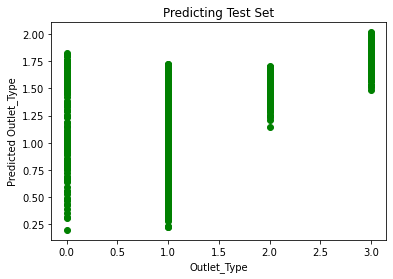

In [12]:
#import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_Visibility', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
target = 'Outlet_Type'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#evaluate the model
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = lin_reg.predict(X_test)


# evaluate the model
print("R^2: {}".format(lin_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()



# Reg regression

Train score:  0.26943750355110097
Test score:  0.28834275480833726
R^2: 0.28834275480833726
Root Mean Squared Error: 0.6891143272200351


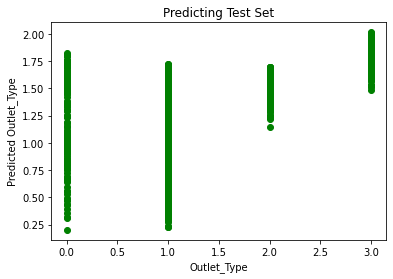

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_Visibility', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
target = 'Outlet_Type'


#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the Ridge regression model with regularization parameter alpha = 0.5
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

#evaluate the model
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = ridge.predict(X_test)


# evaluate the model
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()



# Random Forest

Train score:  1.0
Test score:  1.0
R^2: 1.0
Root Mean Squared Error: 0.0


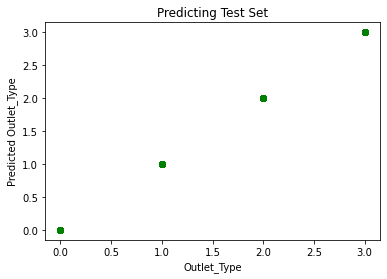

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_Visibility', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
target = 'Outlet_Type'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the random forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

#evaluate the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = rf.predict(X_test)

# evaluate the model
print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()


# XGB Model

Train score:  0.9743230484385017
Test score:  0.9726518851314657
R^2: 0.9726518851314657
Root Mean Squared Error: 0.1350888608407273


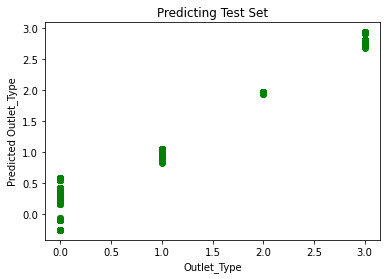

In [15]:

import xgboost as xgb
from sklearn.model_selection import train_test_split

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_Visibility', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
target = 'Outlet_Type'


#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=0)

#create the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)

#evaluate the model
train_score = xg_reg.score(X_train, y_train)
test_score = xg_reg.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = xg_reg.predict(X_test)

# evaluate the model
print("R^2: {}".format(xg_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel(target)
plt.ylabel('Predicted ' + target)
plt.show()